In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score,mean_squared_error
import tensorflow as tf

In [2]:
data=pd.read_csv('C:/Users/14760/Desktop/cleaned_data.csv')
#导入数据集
features=data.drop(['Ms','Hc','Hc_log'],axis=1)
target_Ms=data['Ms']
target_Hc=data['Hc_log']
target=np.array([target_Ms,target_Hc]).T
#划分目标变量
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.15,random_state=42)
#划分数据集

In [3]:
model = Sequential()
model.add(Dense(20, input_dim=31, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(2))  # 输出层，两个节点对应两个目标变量

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                315       
_________________________________________________________________
dense_2 (Dense)              (None, 15)                240       
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 32        
Total params: 1,227
Trainable params: 1,227
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.compile(optimizer='adam', loss='mae')

In [6]:
# 训练模型
history = model.fit(X_train, y_train, epochs=400, batch_size=32, validation_split=0.1)

Epoch 1/400
5/5 [==============================] - 0s 23ms/step - loss: 69.2667 - val_loss: 69.1441
Epoch 2/400
5/5 [==============================] - 0s 4ms/step - loss: 68.2500 - val_loss: 68.3790
Epoch 3/400
5/5 [==============================] - 0s 5ms/step - loss: 67.4773 - val_loss: 67.5886
Epoch 4/400
5/5 [==============================] - 0s 5ms/step - loss: 66.6670 - val_loss: 66.6130
Epoch 5/400
5/5 [==============================] - 0s 5ms/step - loss: 65.6906 - val_loss: 65.3689
Epoch 6/400
5/5 [==============================] - 0s 5ms/step - loss: 64.3953 - val_loss: 63.9109
Epoch 7/400
5/5 [==============================] - 0s 5ms/step - loss: 62.6990 - val_loss: 62.0099
Epoch 8/400
5/5 [==============================] - 0s 5ms/step - loss: 60.5154 - val_loss: 59.6595
Epoch 9/400
5/5 [==============================] - 0s 5ms/step - loss: 57.8927 - val_loss: 56.8884
Epoch 10/400
5/5 [==============================] - 0s 5ms/step - loss: 54.8735 - val_loss: 53.6393
Epoch 11

5/5 [==============================] - 0s 5ms/step - loss: 7.0243 - val_loss: 6.8502
Epoch 167/400
5/5 [==============================] - 0s 5ms/step - loss: 7.0518 - val_loss: 6.9733
Epoch 168/400
5/5 [==============================] - 0s 5ms/step - loss: 7.1392 - val_loss: 6.8022
Epoch 169/400
5/5 [==============================] - 0s 5ms/step - loss: 7.0662 - val_loss: 6.7512
Epoch 170/400
5/5 [==============================] - 0s 5ms/step - loss: 6.9934 - val_loss: 6.8941
Epoch 171/400
5/5 [==============================] - 0s 5ms/step - loss: 6.9589 - val_loss: 6.9352
Epoch 172/400
5/5 [==============================] - 0s 5ms/step - loss: 6.9638 - val_loss: 6.9056
Epoch 173/400
5/5 [==============================] - 0s 5ms/step - loss: 6.9885 - val_loss: 6.9576
Epoch 174/400
5/5 [==============================] - 0s 5ms/step - loss: 6.9806 - val_loss: 6.8352
Epoch 175/400
5/5 [==============================] - 0s 5ms/step - loss: 6.9414 - val_loss: 6.9059
Epoch 176/400
5/5 [=====

Epoch 249/400
5/5 [==============================] - 0s 4ms/step - loss: 6.5412 - val_loss: 6.5310
Epoch 250/400
5/5 [==============================] - 0s 4ms/step - loss: 6.2871 - val_loss: 6.5343
Epoch 251/400
5/5 [==============================] - 0s 4ms/step - loss: 6.4776 - val_loss: 6.3164
Epoch 252/400
5/5 [==============================] - 0s 4ms/step - loss: 6.4429 - val_loss: 6.7141
Epoch 253/400
5/5 [==============================] - 0s 5ms/step - loss: 6.3406 - val_loss: 6.3609
Epoch 254/400
5/5 [==============================] - 0s 4ms/step - loss: 6.3512 - val_loss: 6.4950
Epoch 255/400
5/5 [==============================] - 0s 4ms/step - loss: 6.2672 - val_loss: 6.4585
Epoch 256/400
5/5 [==============================] - 0s 4ms/step - loss: 6.3266 - val_loss: 6.4485
Epoch 257/400
5/5 [==============================] - 0s 4ms/step - loss: 6.2802 - val_loss: 6.4416
Epoch 258/400
5/5 [==============================] - 0s 4ms/step - loss: 6.2587 - val_loss: 6.4774
Epoch 259/

In [7]:
y_pred = model.predict(X_test)

In [8]:
r2=r2_score(y_test[:,0],y_pred[:,0])
rmse=np.sqrt(mean_squared_error(y_test[:,0],y_pred[:,0]))
print(r2)
print(rmse)

0.8714321316572472
19.652630229965528


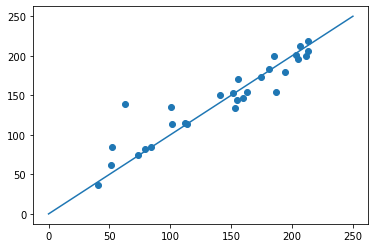

In [9]:
x=np.linspace(0,250,1000)
y=x
plt.plot(x,y)
plt.scatter(y_test[:,0],y_pred[:,0])
plt.show()

In [10]:
r2=r2_score(y_test[:,1],y_pred[:,1])
rmse=np.sqrt(mean_squared_error(y_test[:,1],y_pred[:,1]))
print(r2)
print(rmse)

0.7964727476268573
0.7469245105829514


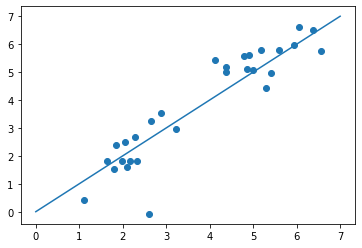

In [11]:
x=np.linspace(0,7,1000)
y=x
plt.plot(x,y)
plt.scatter(y_test[:,1],y_pred[:,1])
plt.show()

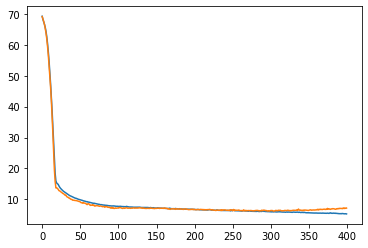

In [12]:
plt.plot(history.epoch,history.history.get('loss'))
plt.plot(history.epoch,history.history.get('val_loss'))

In [13]:
y_train_pred = model.predict(X_train)

In [14]:
r2=r2_score(y_train[:,0],y_train_pred[:,0])
rmse=np.sqrt(mean_squared_error(y_train[:,0],y_train_pred[:,0]))
print(r2)
print(rmse)

0.8719702345824574
17.67828286863599


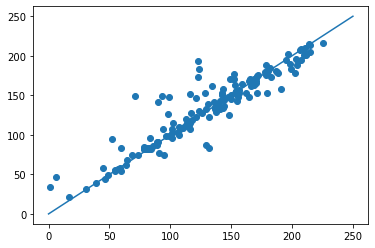

In [15]:
x=np.linspace(0,250,1000)
y=x
plt.plot(x,y)
plt.scatter(y_train[:,0],y_train_pred[:,0])
plt.show()

In [16]:
r2=r2_score(y_train[:,1],y_train_pred[:,1])
rmse=np.sqrt(mean_squared_error(y_train[:,1],y_train_pred[:,1]))
print(r2)
print(rmse)

0.7433016625104832
0.9765305446257091


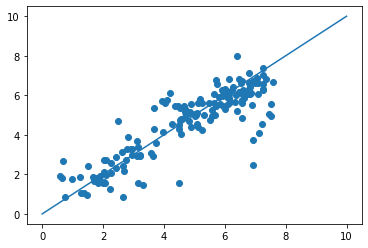

In [17]:
x=np.linspace(0,10,1000)
y=x
plt.plot(x,y)
plt.scatter(y_train[:,1],y_train_pred[:,1])
plt.show()

In [18]:
model.save('20250429.h5')